In [6]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x2ba99f236d0>)

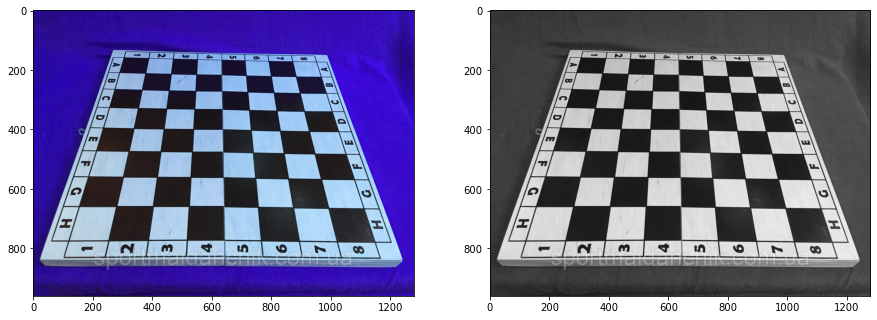

In [7]:
# Let's read the image
img = cv2.imread( "data/chess.jpg")
# Convert it to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)/255
rows, cols = gray.shape

# Let's plot the images (colour and gray scale)
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(gray, cmap='gray')

In [8]:
# Compute Harris corners (use the available OpenCV functions)
# Suggested parameters:
#            block size of 2 pixels
#            gradient kernel size of 3 pixels
#            k parameter equal to 0.04
cornerness = cv2.cornerHarris(gray,2,3,0.04)
# # We are not interested in edges, so put to zero all negative cornerness values
cornerness = np.where(cornerness < 0, 0, cornerness)
# # # Since cornerness has a huge dynamic range, let's take the logarithm for better visualization and manipulation
cornerness = np.log(cornerness + 1e-6)

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x2ba9cb626a0>)

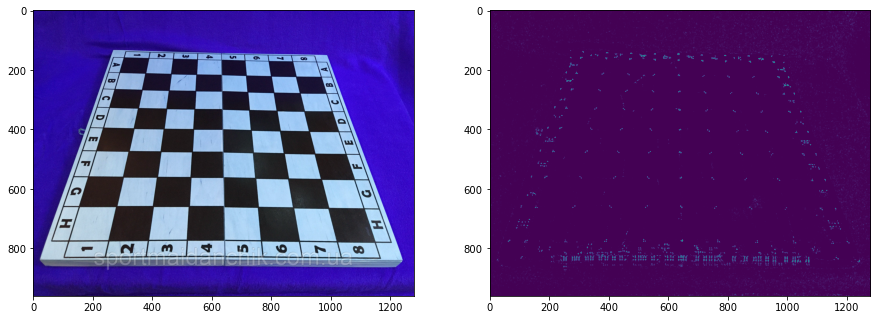

In [9]:
# Let's now plot the image and the corresponding Harris corners (in log scale)
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(cornerness)

In [12]:
# Detection thresholds
th_top_left, th_top_right = -1e6, -1e6
th_bottom_left, th_bottom_right = -1e6, -1e6

# Corner coordinates
opt_top_left, opt_top_right = None, None
opt_bottom_left, opt_bottom_ritgh = None, None

# Size of each quadrant (in pixels)
quad_size = 7

# Let's now scan the Harris detection results
for r in range(quad_size, rows-quad_size):
    for c in range(quad_size, cols-quad_size):
        # Edges with too small cornerness score are discarded, -7 seems like a good value
        if cornerness[r, c] < -7:
            continue
        
        # Extract block consisting of 4 quadrants
        block = 255*gray[r-quad_size:r+quad_size+1, c-quad_size:c+quad_size+1]
        print(type(block))
#         print(block)
        print(block[0:quad_size, 0:quad_size])
#         # Extract the four quandrants
#         quad_top_left = block[0:quad_size, 0:quad_size]
#         quad_top_right = 
#         quad_bottom_left = 
#         quad_bottom_right = 
        
#         # Top-left corner
#         # For the top-left document corner, the bottom-right quadrant is mostly paper and the rest is
#         # darker background. Therefore, I suggest the descriptor to be the average difference between
#         # the paper quandrant and the sum of the 3 remaining bakcground quandrants
#         descriptor = np.mean(quad_bottom_right) - \
#                      np.mean(quad_top_left) - np.mean(quad_top_right) - np.mean(quad_bottom_left)
#         # Let's detect the best descriptor
#         if descriptor > th_top_left:
#             # We update the threshold
#             th_top_left = descriptor
#             # And we update the optimal location
#             opt_top_left = (c, r)
            
#         # Top-right corner
#         # (your implementation goes here)
            
#         # Bottom-left corner
#         # (your implementation goes here)
            
#         # Bottom-right corner
#         # (your implementation goes here)

# # Let's draw circles at the detected corners
# out = cv2.circle(img, opt_top_left, 3, (255,0,0), -1)
# out = cv2.circle(img, opt_top_right, 3, (255,0,0), -1)
# out = cv2.circle(img, opt_bottom_left, 3, (255,0,0), -1)
# out = cv2.circle(img, opt_bottom_right, 3, (255,0,0), -1)

# # And finally we plot the images (with the detected document corners)
# plt.subplot(121), plt.imshow(out)
# plt.subplot(122), plt.imshow(cornerne

<class 'numpy.ndarray'>
[[61. 53. 48. 56. 49. 46. 44.]
 [51. 50. 44. 56. 48. 39. 49.]
 [48. 59. 40. 47. 58. 56. 60.]
 [52. 60. 53. 56. 51. 39. 40.]
 [55. 43. 57. 55. 49. 54. 59.]
 [58. 56. 54. 45. 53. 56. 45.]
 [60. 61. 51. 53. 62. 51. 74.]]
<class 'numpy.ndarray'>
[[ 51.  52.  47.  45.  51.  52.  50.]
 [ 43.  45.  43.  44.  52.  54.  52.]
 [ 79.  81.  76.  71.  69.  65.  61.]
 [190. 196. 194. 188. 185. 182. 183.]
 [191. 191. 191. 188. 182. 192. 178.]
 [185. 195. 182. 185. 192. 167. 174.]
 [183. 187. 181. 184. 182. 172. 179.]]
<class 'numpy.ndarray'>
[[ 52.  47.  45.  51.  52.  50.  52.]
 [ 45.  43.  44.  52.  54.  52.  54.]
 [ 81.  76.  71.  69.  65.  61.  64.]
 [196. 194. 188. 185. 182. 183. 191.]
 [191. 191. 188. 182. 192. 178. 185.]
 [195. 182. 185. 192. 167. 174. 197.]
 [187. 181. 184. 182. 172. 179. 110.]]
<class 'numpy.ndarray'>
[[ 45.  43.  44.  52.  54.  52.  54.]
 [ 81.  76.  71.  69.  65.  61.  64.]
 [196. 194. 188. 185. 182. 183. 191.]
 [191. 191. 188. 182. 192. 178. 185.]


[[193. 197. 199. 200. 184. 198. 199.]
 [200. 204. 197. 194. 202. 185. 194.]
 [197. 196. 196. 184. 196. 192. 185.]
 [ 53. 103. 170. 200. 196. 193. 189.]
 [ 14.  11.  40.  60. 124. 161. 211.]
 [ 33.  27.   7.  29.   9.  19. 105.]
 [ 23.  27.  25.  16.  19.  38.  15.]]
<class 'numpy.ndarray'>
[[186. 208. 186. 199. 195. 203. 187.]
 [197. 151. 115. 125. 138. 153. 154.]
 [178.  52.  12.  14.  17.  22. 111.]
 [179.  34.  16.  26.  14.  48. 199.]
 [149.  12.  15.  20.  12.  69. 190.]
 [141.  18.  26.  24.  18.  45. 199.]
 [151.  23.  19.  15.  16.  15. 148.]]
<class 'numpy.ndarray'>
[[199. 195. 203. 187. 197. 184. 193.]
 [125. 138. 153. 154. 200. 203. 177.]
 [ 14.  17.  22. 111. 204. 190. 198.]
 [ 26.  14.  48. 199. 180. 185. 209.]
 [ 20.  12.  69. 190. 210. 193. 194.]
 [ 24.  18.  45. 199. 188. 184. 192.]
 [ 15.  16.  15. 148. 214. 201. 205.]]
<class 'numpy.ndarray'>
[[193. 188. 194. 192. 189. 185. 199.]
 [177. 195. 187. 201. 208. 201. 206.]
 [198. 157. 102. 100. 111. 118. 132.]
 [209. 160.  

<class 'numpy.ndarray'>
[[199. 194. 199. 202. 193. 211. 147.]
 [190. 202. 199. 202. 196. 205. 159.]
 [205. 201. 194. 204. 204. 196. 196.]
 [188. 191. 187. 196. 202. 190. 189.]
 [ 40.  45.  50.  71.  67.  54.  54.]
 [101. 109. 100.  90.  83.  81.  68.]
 [205. 212. 208. 197. 207. 210. 217.]]
<class 'numpy.ndarray'>
[[193. 216.  59.  14.  81. 212. 201.]
 [203. 212.  97.  13.  41. 192. 203.]
 [202. 201. 134.  25.  32. 144. 209.]
 [204. 204. 185.  37.  17. 116. 204.]
 [208. 210. 195.  50.  16.  87. 214.]
 [ 87.  81.  97.  71.  15.  42. 101.]
 [ 14.  18.  13.  20.  27.  34.  20.]]
<class 'numpy.ndarray'>
[[201. 199. 210. 200. 210. 198.  92.]
 [200. 198. 202. 205. 194. 206. 148.]
 [199. 203. 191. 197. 202. 192. 176.]
 [195. 199. 200. 190. 203. 196. 199.]
 [200. 192. 204. 191. 195. 191. 204.]
 [201. 207. 201. 208. 205. 193. 216.]
 [122. 129. 116. 121. 125. 129. 127.]]
<class 'numpy.ndarray'>
[[199. 210. 200. 210. 198.  92.  21.]
 [198. 202. 205. 194. 206. 148.  19.]
 [203. 191. 197. 202. 192. 

[[191. 217. 132.  16.  34.  34.  28.]
 [212. 218. 168.  17.  17.  19.  20.]
 [198. 196. 187.  40.  34.  27.  23.]
 [207. 219. 205.  50.  17.  22.  25.]
 [165. 174. 155.  52.  11.  26.  33.]
 [ 17.  13.  25.  23.  27.  24.  18.]
 [ 30.  26.  21.  26.  28.  19.  34.]]
<class 'numpy.ndarray'>
[[217. 132.  16.  34.  34.  28.  21.]
 [218. 168.  17.  17.  19.  20.  21.]
 [196. 187.  40.  34.  27.  23.  24.]
 [219. 205.  50.  17.  22.  25.  25.]
 [174. 155.  52.  11.  26.  33.  26.]
 [ 13.  25.  23.  27.  24.  18.  13.]
 [ 26.  21.  26.  28.  19.  34.  68.]]
<class 'numpy.ndarray'>
[[214. 209. 213. 209. 219. 199.  40.]
 [207. 209. 216. 201. 210. 216.  76.]
 [206. 212. 215. 209. 211. 210. 143.]
 [206. 204. 208. 212. 213. 210. 193.]
 [210. 207. 208. 206. 206. 217. 208.]
 [214. 219. 215. 212. 207. 219. 218.]
 [203. 207. 201. 214. 209. 207. 220.]]
<class 'numpy.ndarray'>
[[209. 213. 209. 219. 199.  40.  28.]
 [209. 216. 201. 210. 216.  76.  27.]
 [212. 215. 209. 211. 210. 143.  24.]
 [204. 208. 2

[[ 22.  22.  22.  23.  25.  26.  27.]
 [ 14.  18.  21.  22.  23.  24.  23.]
 [ 20.  25.  28.  25.  21.  21.  22.]
 [ 23.  27.  27.  22.  20.  24.  27.]
 [ 13.  16.  15.  12.  13.  17.  16.]
 [ 86.  87.  86.  83.  85.  84.  73.]
 [203. 201. 194. 199. 192. 195. 199.]]
<class 'numpy.ndarray'>
[[ 22.  22.  23.  25.  26.  27.  26.]
 [ 18.  21.  22.  23.  24.  23.  22.]
 [ 25.  28.  25.  21.  21.  22.  22.]
 [ 27.  27.  22.  20.  24.  27.  28.]
 [ 16.  15.  12.  13.  17.  16.  10.]
 [ 87.  86.  83.  85.  84.  73.  58.]
 [201. 194. 199. 192. 195. 199. 178.]]
<class 'numpy.ndarray'>
[[201. 201. 209. 181.  53.  25.  25.]
 [198. 198. 200. 170.  23.  13.  19.]
 [200. 201. 205. 175.  15.  31.  21.]
 [197. 198. 203. 155.   6.  30.  21.]
 [202. 204. 222. 151.  19.  20.  29.]
 [ 74.  76.  66.  55.  25.  14.  23.]
 [ 12.  10.   8.  18.  18.  21.  35.]]
<class 'numpy.ndarray'>
[[27. 28. 27. 25. 26. 28. 19.]
 [26. 27. 26. 24. 25. 28. 22.]
 [25. 27. 27. 25. 27. 30. 16.]
 [26. 28. 28. 27. 28. 32. 16.]
 [2

 [23. 23. 21. 26. 26. 25. 23.]]
<class 'numpy.ndarray'>
[[26. 23. 19. 30. 22. 26. 19.]
 [26. 23. 16. 30. 24. 23. 11.]
 [24. 21. 22. 24. 20. 26. 13.]
 [23. 21. 27. 23. 21. 26. 22.]
 [25. 23. 22. 25. 24. 17. 36.]
 [25. 23. 20. 25. 25. 15. 62.]
 [23. 21. 26. 26. 25. 23. 90.]]
<class 'numpy.ndarray'>
[[ 23.  19.  30.  22.  26.  19.  51.]
 [ 23.  16.  30.  24.  23.  11.  88.]
 [ 21.  22.  24.  20.  26.  13. 116.]
 [ 21.  27.  23.  21.  26.  22. 143.]
 [ 23.  22.  25.  24.  17.  36. 171.]
 [ 23.  20.  25.  25.  15.  62. 197.]
 [ 21.  26.  26.  25.  23.  90. 216.]]
<class 'numpy.ndarray'>
[[193. 201. 200. 209. 171.  22.  20.]
 [194. 202. 199. 211. 130.  18.  15.]
 [194. 201. 200. 197.  68.  16.  15.]
 [194. 199. 208. 168.  25.  16.  22.]
 [200. 197. 206. 118.  14.  22.  20.]
 [210. 194. 194.  68.  13.  24.  77.]
 [198. 207. 166.  34.  22.  46. 187.]]
<class 'numpy.ndarray'>
[[191. 196. 202. 202. 201. 204. 204.]
 [198. 186. 204. 203. 195. 202. 210.]
 [194. 196. 199. 194. 192. 195. 192.]
 [200.

<class 'numpy.ndarray'>
[[227. 222. 226. 208.  51.  25.  31.]
 [215. 228. 216. 231.  96.  23.  37.]
 [213. 219. 224. 234. 171.  26.  34.]
 [212. 220. 224. 221. 215.  63.  31.]
 [218. 219. 223. 214. 217. 109.  35.]
 [224. 217. 219. 219. 235. 164.  15.]
 [219. 220. 214. 222. 215. 210.  58.]]
<class 'numpy.ndarray'>
[[ 65.  38.  22.  35.  33.  73. 225.]
 [121.  15.  45.  35.  19.  49. 183.]
 [101.  13.  46.  37.  27.  28. 132.]
 [ 19.  27.  39.  27.  34.  16.  71.]
 [ 32.  45.  31.  35.  39.  27.  36.]
 [ 43.  26.  21.  33.  36.  30.  26.]
 [ 21.  27.  29.  25.  25.  21.  25.]]
<class 'numpy.ndarray'>
[[ 38.  22.  35.  33.  73. 225. 210.]
 [ 15.  45.  35.  19.  49. 183. 224.]
 [ 13.  46.  37.  27.  28. 132. 226.]
 [ 27.  39.  27.  34.  16.  71. 221.]
 [ 45.  31.  35.  39.  27.  36. 179.]
 [ 26.  21.  33.  36.  30.  26. 119.]
 [ 27.  29.  25.  25.  21.  25.  82.]]
<class 'numpy.ndarray'>
[[215. 228. 216. 231.  96.  23.  37.]
 [213. 219. 224. 234. 171.  26.  34.]
 [212. 220. 224. 221. 215. 

 [ 26.  35.  18.  86. 179. 176. 190.]]
<class 'numpy.ndarray'>
[[ 83.  91.  98.  97.  91.  88.  85.]
 [ 19.  17.  16.  13.  21.  19.  18.]
 [ 31.  30.  30.  32.  29.  30.  31.]
 [ 30.  26.  23.  28.  26.  29.  31.]
 [ 31.  28.  25.  32.  26.  25.  24.]
 [ 30.  26.  23.  31.  48.  42.  34.]
 [ 35.  18.  86. 179. 176. 190.  93.]]
<class 'numpy.ndarray'>
[[213. 217. 219. 218. 214. 213. 215.]
 [222. 220. 210. 218. 217. 211. 209.]
 [210. 210. 219. 219. 214. 220. 220.]
 [214. 213. 226. 217. 212. 222. 214.]
 [215. 222. 224. 211. 215. 221. 213.]
 [217. 212. 213. 219. 225. 221. 215.]
 [223. 220. 214. 217. 210. 210. 223.]]
<class 'numpy.ndarray'>
[[213. 215. 215. 212. 214. 216. 218.]
 [211. 209. 208. 219. 220. 207. 222.]
 [220. 220. 213. 218. 217. 223. 224.]
 [222. 214. 205. 206. 209. 210. 211.]
 [221. 213. 218. 223. 218. 212. 220.]
 [221. 215. 214. 205. 216. 217. 226.]
 [210. 223. 223. 223. 209. 210. 208.]]
<class 'numpy.ndarray'>
[[216. 218. 219. 218. 216. 214. 214.]
 [207. 222. 212. 221. 223.

<class 'numpy.ndarray'>
[[ 46. 178. 216. 210. 210. 212. 213.]
 [100. 205. 211. 211. 210. 211. 213.]
 [141. 209. 211. 214. 212. 211. 214.]
 [174. 209. 211. 217. 213. 212. 214.]
 [208. 211. 207. 215. 212. 221. 215.]
 [202. 210. 210. 212. 213. 207. 211.]
 [202. 209. 213. 211. 218. 210. 209.]]
<class 'numpy.ndarray'>
[[200. 200. 201. 202. 202. 202. 203.]
 [201. 201. 201. 202. 203. 203. 203.]
 [202. 202. 202. 203. 204. 205. 203.]
 [203. 203. 203. 204. 205. 206. 205.]
 [203. 204. 205. 205. 205. 205. 197.]
 [203. 204. 206. 206. 206. 206. 207.]
 [202. 200. 199. 198. 196. 195. 203.]]
<class 'numpy.ndarray'>
[[200. 201. 202. 202. 202. 203. 204.]
 [201. 201. 202. 203. 203. 203. 204.]
 [202. 202. 203. 204. 205. 203. 205.]
 [203. 203. 204. 205. 206. 205. 206.]
 [204. 205. 205. 205. 205. 197. 213.]
 [204. 206. 206. 206. 206. 207. 202.]
 [200. 199. 198. 196. 195. 203. 194.]]
<class 'numpy.ndarray'>
[[100. 205. 211. 211. 210. 211. 213.]
 [141. 209. 211. 214. 212. 211. 214.]
 [174. 209. 211. 217. 213. 

<class 'numpy.ndarray'>
[[ 36.  40.  25.  44. 144.  64. 150.]
 [ 37.  42.  28.  45. 141.  66. 142.]
 [ 33.  35.  27.  43. 127.  70. 140.]
 [ 30.  29.  27.  45. 117.  69. 138.]
 [ 32.  29.  33.  53. 116.  55. 128.]
 [ 30.  25.  22.  35. 100.  60. 137.]
 [ 23.  36.  36.  38.  90.  62. 123.]]
<class 'numpy.ndarray'>
[[ 40.  25.  44. 144.  64. 150. 213.]
 [ 42.  28.  45. 141.  66. 142. 207.]
 [ 35.  27.  43. 127.  70. 140. 209.]
 [ 29.  27.  45. 117.  69. 138. 214.]
 [ 29.  33.  53. 116.  55. 128. 211.]
 [ 25.  22.  35. 100.  60. 137. 203.]
 [ 36.  36.  38.  90.  62. 123. 116.]]
<class 'numpy.ndarray'>
[[214. 215. 216. 217. 218. 220. 229.]
 [214. 214. 215. 218. 219. 219. 227.]
 [215. 214. 216. 219. 220. 218. 227.]
 [216. 214. 217. 220. 220. 217. 229.]
 [216. 215. 217. 221. 220. 216. 231.]
 [212. 216. 219. 219. 221. 223. 232.]
 [217. 218. 221. 222. 220. 218. 221.]]
<class 'numpy.ndarray'>
[[215. 216. 217. 218. 220. 229. 115.]
 [214. 215. 218. 219. 219. 227. 126.]
 [214. 216. 219. 220. 218. 

<class 'numpy.ndarray'>
[[ 31.  24.  32.  28.  22.  54. 190.]
 [ 33.  25.  30.  27.  21.  65. 199.]
 [ 31.  26.  31.  30.  20.  75. 206.]
 [ 29.  27.  32.  33.  16.  81. 212.]
 [ 28.  28.  31.  34.  14.  89. 218.]
 [ 28.  27.  27.  33.  14. 103. 221.]
 [ 28.  26.  25.  34.  18. 117. 222.]]
<class 'numpy.ndarray'>
[[216. 218. 218. 210. 212. 184.  48.]
 [217. 226. 222. 208. 209. 146.  39.]
 [213. 213. 215. 217. 212.  94.  31.]
 [213. 211. 215. 224. 186.  50.  30.]
 [218. 220. 217. 217. 133.  31.  37.]
 [217. 219. 210. 208.  94.  30.  37.]
 [219. 219. 210. 182.  56.  37.  29.]]
<class 'numpy.ndarray'>
[[218. 218. 210. 212. 184.  48.  33.]
 [226. 222. 208. 209. 146.  39.  36.]
 [213. 215. 217. 212.  94.  31.  32.]
 [211. 215. 224. 186.  50.  30.  26.]
 [220. 217. 217. 133.  31.  37.  46.]
 [219. 210. 208.  94.  30.  37.  78.]
 [219. 210. 182.  56.  37.  29. 109.]]
<class 'numpy.ndarray'>
[[218. 210. 212. 184.  48.  33.  27.]
 [222. 208. 209. 146.  39.  36.  34.]
 [215. 217. 212.  94.  31. 

<class 'numpy.ndarray'>
[[228. 231. 234. 177.  51.  55.  68.]
 [227. 221. 228. 227.  95.  38.  79.]
 [224. 226. 223. 236. 157.  40.  75.]
 [224. 232. 223. 219. 193.  64.  62.]
 [225. 224. 225. 232. 214. 102.  59.]
 [225. 220. 233. 224. 229. 126.  61.]
 [231. 218. 225. 229. 235. 165.  40.]]
<class 'numpy.ndarray'>
[[ 52.  49.  44.  49.  50. 110. 228.]
 [ 58.  58.  61.  67.  46.  80. 190.]
 [ 57.  59.  64.  73.  48.  55. 132.]
 [ 59.  61.  56.  66.  60.  61. 107.]
 [ 56.  64.  56.  63.  63.  55.  70.]
 [ 57.  60.  63.  62.  60.  57.  58.]
 [ 61.  60.  60.  61.  62.  62.  64.]]
<class 'numpy.ndarray'>
[[ 49.  44.  49.  50. 110. 228. 235.]
 [ 58.  61.  67.  46.  80. 190. 238.]
 [ 59.  64.  73.  48.  55. 132. 231.]
 [ 61.  56.  66.  60.  61. 107. 218.]
 [ 64.  56.  63.  63.  55.  70. 179.]
 [ 60.  63.  62.  60.  57.  58. 132.]
 [ 60.  60.  61.  62.  62.  64.  85.]]
<class 'numpy.ndarray'>
[[227. 221. 228. 227.  95.  38.  79.]
 [224. 226. 223. 236. 157.  40.  75.]
 [224. 232. 223. 219. 193. 

 [226. 222. 220. 222. 227. 211. 211.]]
<class 'numpy.ndarray'>
[[218. 219. 220. 221. 219. 223. 229.]
 [216. 218. 222. 221. 219. 220. 227.]
 [216. 218. 223. 221. 220. 220. 225.]
 [220. 221. 222. 218. 223. 222. 223.]
 [224. 223. 221. 216. 225. 224. 223.]
 [220. 222. 221. 220. 219. 220. 223.]
 [222. 220. 222. 227. 211. 211. 222.]]
<class 'numpy.ndarray'>
[[ 37.  29.  47. 149.  58.  67. 201.]
 [ 31.  29.  47. 149.  61.  62. 201.]
 [ 30.  28.  47. 147.  63.  62. 199.]
 [ 33.  29.  50. 147.  67.  65. 198.]
 [ 33.  31.  53. 148.  70.  69. 199.]
 [ 35.  26.  51. 158.  62.  71. 198.]
 [ 35.  29.  53. 162.  72.  67. 196.]]
<class 'numpy.ndarray'>
[[28. 29. 29. 28. 28. 31. 29.]
 [29. 25. 26. 29. 28. 34. 20.]
 [28. 28. 27. 31. 26. 36. 12.]
 [26. 30. 27. 31. 26. 41. 16.]
 [27. 24. 25. 31. 28. 36. 27.]
 [30. 36. 26. 27. 31. 40. 11.]
 [27. 19. 22. 24. 23. 40. 24.]]
<class 'numpy.ndarray'>
[[ 29.  29.  28.  28.  31.  29.  30.]
 [ 25.  26.  29.  28.  34.  20.  37.]
 [ 28.  27.  31.  26.  36.  12.  52.]

[[ 57.  82. 107.  83.  89.  72.  52.]
 [ 71. 194. 238. 228. 212. 167.  90.]
 [149. 225. 216. 229. 223. 231. 197.]
 [185. 228. 231. 232. 236. 215. 224.]
 [194. 222. 229. 210. 242. 224. 217.]
 [195. 223. 235. 228. 220. 230. 230.]
 [189. 224. 225. 237. 217. 224. 212.]]
<class 'numpy.ndarray'>
[[ 82. 107.  83.  89.  72.  52.  62.]
 [194. 238. 228. 212. 167.  90.  47.]
 [225. 216. 229. 223. 231. 197.  87.]
 [228. 231. 232. 236. 215. 224. 146.]
 [222. 229. 210. 242. 224. 217. 197.]
 [223. 235. 228. 220. 230. 230. 203.]
 [224. 225. 237. 217. 224. 212. 231.]]
<class 'numpy.ndarray'>
[[203. 214. 217. 211. 167.  54.  29.]
 [204. 212. 212. 206. 163.  51.  28.]
 [209. 215. 209. 203. 165.  53.  31.]
 [212. 216. 206. 205. 175.  65.  29.]
 [209. 210. 199. 202. 180.  74.  21.]
 [212. 210. 204. 200. 199.  85.  26.]
 [212. 209. 202. 197. 195. 110.  35.]]
<class 'numpy.ndarray'>
[[ 54.  29.  23.  26.  26.  28.  26.]
 [ 51.  28.  25.  32.  29.  29.  16.]
 [ 53.  31.  31.  28.  27.  35.  21.]
 [ 65.  29.  

[[218. 227. 225. 223. 220. 230. 199.]
 [219. 227. 223. 223. 219. 228. 208.]
 [222. 227. 222. 226. 224. 232. 220.]
 [221. 218. 215. 231. 227. 229. 223.]
 [225. 227. 226. 223. 221. 225. 236.]
 [220. 226. 218. 214. 225. 223. 226.]
 [219. 223. 234. 227. 226. 225. 225.]]
<class 'numpy.ndarray'>
[[227. 225. 223. 220. 230. 199.  68.]
 [227. 223. 223. 219. 228. 208.  99.]
 [227. 222. 226. 224. 232. 220. 127.]
 [218. 215. 231. 227. 229. 223. 132.]
 [227. 226. 223. 221. 225. 236. 157.]
 [226. 218. 214. 225. 223. 226. 158.]
 [223. 234. 227. 226. 225. 225. 157.]]
<class 'numpy.ndarray'>
[[199.  68.  65.  96. 125. 206. 235.]
 [208.  99.  67.  96. 112. 187. 239.]
 [220. 127.  74.  94.  96. 173. 240.]
 [223. 132.  81.  95.  94. 152. 228.]
 [236. 157.  81.  79.  89. 137. 226.]
 [226. 158.  88.  94.  93. 120. 217.]
 [225. 157.  94.  82.  95. 102. 184.]]
<class 'numpy.ndarray'>
[[224. 209. 196. 200. 220. 239. 237.]
 [228. 222. 218. 213. 215. 229. 226.]
 [223. 220. 229. 217. 199. 217. 233.]
 [221. 220. 2